In [2]:
#!pip install --user seaborn
#!pip install --user matplotlib

    100% |████████████████████████████████| 204kB 7.1MB/s ta 0:00:01
    100% |████████████████████████████████| 12.6MB 3.7MB/s eta 0:00:01
    100% |████████████████████████████████| 952kB 31.2MB/s ta 0:00:01
    100% |████████████████████████████████| 102kB 42.1MB/s a 0:00:01
  Running setup.py bdist_wheel for seaborn ... done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/fc/1c/74/c8f80a532c06a789599b8659b117ec7d7574cac4a06f7dabfe
  Running setup.py bdist_wheel for subprocess32 ... done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/c0/08/48/bb468e57d688ea6fa40a450d88d7d9f5fb3c955510077da743
Successfully built seaborn subprocess32


RocketML text topic modeling using SVD
==========================

**Import Libraries**

In [3]:
from rocketml.io import DocumentSet
from rocketml.decomposition import TruncatedSVD
from rocketml.preprocessing import TextFilter
from rocketml import Pipeline
import sys

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.plotting import figure,show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models.ranges import Range1d
from bokeh.models import LabelSet

%matplotlib inline

In [4]:
print('Seaborn Version: '+str(sns.__version__))
print('Pandas Version: '+str(pd.__version__))
print('Matplotlib Version: '+str(matplotlib.__version__))

Seaborn Version: 0.9.0
Pandas Version: 0.23.1
Matplotlib Version: 2.2.3


Create Document Set
-----------

In [8]:
file_location='/home/ubuntu/SoundDir'

Preview a text file

In [17]:
preview=pd.read_csv(file_location+"/AudioData.txt",delimiter=' ', header=None, error_bad_lines=False).transpose()
preview=pd.concat([preview[col] for col in preview])
preview.columns=['words']
preview.head(n=15)

Skipping line 7: expected 43 fields, saw 45
Skipping line 11: expected 43 fields, saw 47
Skipping line 13: expected 43 fields, saw 60
Skipping line 15: expected 43 fields, saw 54



0       anyhow
1        whole
2           we
3     pancates
4         made
5         with
6         sour
7           do
8          for
9          the
10       night
11     morning
12     running
13         was
14         too
dtype: object

Add list of files to be analyzed for term frequency.

In [22]:
filelist = [file_location+"/AudioData.txt",\
            file_location+"/rank_0-chunk0_16bit.wav-data.txt",\
            file_location+"/rank_0-chunk1_16bit.wav-data.txt",\
            file_location+"/rank_0-chunk3_16bit.wav-data.txt",\
            file_location+"/rank_0-chunk4_16bit.wav-data.txt",]
docset = DocumentSet(filelist=filelist)
print('Documents to be analyzed: ',len(docset.documents))

('Documents to be analyzed: ', 5)


Filter out stop words, stemming, and length

In [23]:
tf = TextFilter(stop_word_filter=True,stemming_filter=True,length_filter=True)

Apply Single Value Decomposition to filtered text files

In [24]:
svd = TruncatedSVD()
pipeline = Pipeline([tf,svd])
pipeline.fit(docset)

text
------------------
Cluster Resources
------------------
Nodes        = 2
Sockets/node = 2
Cores/socket = 1
--------------------------
Total Cores    = 4
Total Memory(GB)   = 15.59
--------------------------
/shared/jobs_folder/3bb36408/output.txt


In [25]:
#docset = DocumentSet(filename=filename)
docset_transform = pipeline.fit_transform(docset)

text
------------------
Cluster Resources
------------------
Nodes        = 2
Sockets/node = 2
Cores/socket = 1
--------------------------
Total Cores    = 4
Total Memory(GB)   = 15.59
--------------------------
/shared/jobs_folder/3bb36408/output.txt


**Plot Singular Values**

Text(0.5,1,'Single Value Decomposition')

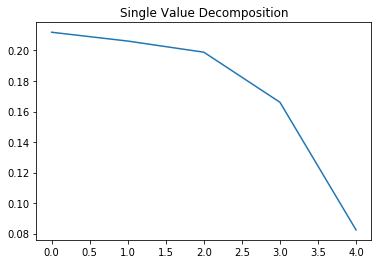

In [26]:
#sns.tsplot(svd.singular_values_)
plt.plot(svd.singular_values_)
plt.title('Single Value Decomposition')

**Check term frequencies**

Showing the top 10% frequencies

In [27]:
term_freq = pd.DataFrame([[key,value] for key,value in docset.terms_document_frequencies.iteritems()],columns=["Term","Frequency"])
term_freq.sort_values(by='Frequency',ascending=False).head(n=int(len(term_freq)*.1))

,Term,Frequency
200,space,4
135,nineteen,3
98,three,3
86,om,3
14,earth,3
75,led,2
76,lebrivox,2
124,peopl,2
123,way,2
122,murder,2


In [28]:
print('The top 10% frequency has ',len(term_freq)*.1,'values.')

('The top 10% frequency has ', 20.700000000000003, 'values.')


In [29]:
output_notebook()

Loading BokehJS ...

Selecting items greater than the median.

In [30]:
df_high = term_freq[term_freq["Frequency"] > int(term_freq.median().item())].sort_values(by=["Frequency"],ascending=False)

In [31]:
source = ColumnDataSource(df_high)

In [32]:
df_high

,Term,Frequency
200,space,4
14,earth,3
98,three,3
135,nineteen,3
86,om,3
0,fute,2
134,louisziana,2
153,penny,2
148,lebri,2
142,gotten,2


Plot values text frequencies greater than the median

In [44]:
import math
p = figure(plot_width=1000,plot_height=500,title="Term Frequencies",x_range=df_high["Term"].values,y_range=Range1d(0,df_high["Frequency"].max()))
p.vbar(x="Term",top = "Frequency",width=0.2,source=source)

labels = LabelSet(x="Term", y="Frequency", text="Frequency",
        x_offset=0, y_offset=0, source=source, render_mode='canvas')

p.add_tools(HoverTool(tooltips=[("Term","@Term"),("Frequency","@Frequency")]))
p.add_layout(labels)
p.xaxis.major_label_orientation = math.pi/2
show(p)

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from bokeh.palettes import Category20

Run K-Means on Word Frequencies
-----

Selecting clusters

In [46]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)

Fit K-means

In [47]:
kmeans.fit(docset_transform)
#kmeans.fit(docset)
y_kmeans = kmeans.predict(docset_transform)
#y_kmeans = kmeans.predict(docset)

Seperate clusters into colors and display color list

In [48]:
colors_list = []
for yk in y_kmeans:
    colors_list.append(Category20[20][yk])
#colors_list

In [49]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, ColorBar
from bokeh.models import LabelSet
from bokeh.transform import linear_cmap

x = range(0,len(colors_list))
y = range(0,len(colors_list))

#Use the field name of the column source
mapper = linear_cmap(field_name='y', palette=colors_list ,low=min(y) ,high=max(y))
source = ColumnDataSource(dict(x=x,y=y,names=colors_list))

p = figure(plot_width=300, plot_height=300,title="Linear Color Map Based on Y-Outcome")
p.circle(x='x', y='y', line_color=mapper,color=mapper, fill_alpha=1, size=12, source=source)

labels = LabelSet(x='x', y='y', text='names', level='glyph',
              x_offset=3, y_offset=3, source=source, render_mode='canvas')

color_bar = ColorBar(color_mapper=mapper['transform'], width=8,  location=(0,0))
p.add_layout(color_bar, 'right')
p.add_layout(labels)
show(p)

In [50]:
source = ColumnDataSource(term_freq)

In [51]:
#docset_transform[:,0]

In [52]:
#docset_transform[:,1]

In [53]:
p1 = figure(plot_width=1000,plot_height=500,tools="pan,wheel_zoom,box_zoom,reset,hover",title="Plotting Clusters: Colors Representing Like Values")
p1.scatter(docset_transform[:,0],docset_transform[:,1],color=colors_list)
show(p1)